# Data Analysis on Indian Restaurants

## Importing the libraries

In [1]:
'pip install seaborn'
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.options.display.float_format='{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:

df=pd.read_csv("indian_restaurants.csv")

In [3]:
df.head(10)

,restaurant_name,rating,average_price,average _delivery_time,south_indian_or_not,north_indian_or_not,fast_food_or_not,street_food,biryani_or_not,bakery_or_not,location
0,# Momo,4.20,200,34,0,0,0,0,0,0,Durgapur
1,#99,4.10,100,31,0,0,0,0,0,0,Bareilly
2,#BBQ,3.60,200,57,0,0,1,0,0,0,Mangalore
3,#Dilliwaala6,3.70,100,38,0,1,0,1,0,0,Puducherry
4,#FlyFree,4.00,200,26,0,0,1,0,0,0,Ajmer
5,#Foodiz,3.50,100,23,0,1,1,0,0,0,Udaipur
6,#Hashtag Momos,4.30,300,25,0,0,1,0,0,0,Jaipur
7,#PB Patiala Bites,4.00,350,47,0,1,1,0,0,0,Udaipur
8,'@ Pizza,4.00,200,71,0,0,0,0,0,0,Kolkata
9,'@ Spirants Chai,4.20,150,24,0,0,0,0,0,0,Gaya


In [4]:
df.tail(10)

,restaurant_name,rating,average_price,average _delivery_time,south_indian_or_not,north_indian_or_not,fast_food_or_not,street_food,biryani_or_not,bakery_or_not,location
27646,Shri Bikaner Sweets Bakery And Dairy,3.50,200,36,0,0,0,1,0,1,Udaipur
27647,Shri Brijwasi,4.00,200,21,0,1,0,1,0,0,Amritsar
27648,Shri Brijwasi Food,3.90,300,20,0,0,0,1,0,0,Amritsar
27649,Shri Cafetaria,4.20,300,25,1,0,0,0,0,0,Salem
27650,Shri Chappan Bhog Sweets And Food Circle,3.30,250,42,1,1,1,1,0,0,Agra
27651,Shri Chau Mau Fast Food,3.80,150,28,0,0,1,1,0,0,Nagpur
27652,Shri Chinese Center,2.80,150,37,0,0,0,0,0,0,Jabalpur
27653,Shri Dakshinam,3.90,100,31,1,0,0,0,0,0,Indore
27654,Shri Dashratna Veg Nonveg Restaurant,4.20,250,19,0,1,0,0,0,0,Amravati
27655,Shri Devraj Bhojnalaya,3.10,150,31,0,1,0,0,0,0,Bareilly


In [5]:
print(df.shape)
print(df.duplicated().sum())
df.isnull().sum()

(27656, 11)
0


restaurant_name           0
rating                    0
average_price             0
average _delivery_time    0
south_indian_or_not       0
north_indian_or_not       0
fast_food_or_not          0
street_food               0
biryani_or_not            0
bakery_or_not             0
location                  0
dtype: int64

#### The above code shows that the dataset has 27656 rows and 11 columns.
#### The no of duplicate values is 0
##### There are no null values present in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   restaurant_name         27656 non-null  object 
 1   rating                  27656 non-null  float64
 2   average_price           27656 non-null  int64  
 3   average _delivery_time  27656 non-null  int64  
 4   south_indian_or_not     27656 non-null  int64  
 5   north_indian_or_not     27656 non-null  int64  
 6   fast_food_or_not        27656 non-null  int64  
 7   street_food             27656 non-null  int64  
 8   biryani_or_not          27656 non-null  int64  
 9   bakery_or_not           27656 non-null  int64  
 10  location                27656 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 2.3+ MB


In [7]:
df.describe()

,rating,average_price,average _delivery_time,south_indian_or_not,north_indian_or_not,fast_food_or_not,street_food,biryani_or_not,bakery_or_not
count,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00
mean,3.92,173.87,33.36,0.13,0.42,0.36,0.18,0.18,0.10
std,0.35,86.71,10.11,0.34,0.49,0.48,0.38,0.38,0.29
min,2.40,10.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.70,100.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4.00,150.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,4.20,200.00,40.00,0.00,1.00,1.00,0.00,0.00,0.00
max,4.90,800.00,190.00,1.00,1.00,1.00,1.00,1.00,1.00


In [8]:
df.location.unique()

array(['Durgapur', 'Bareilly', 'Mangalore', 'Puducherry', 'Ajmer',
       'Udaipur', 'Jaipur', 'Kolkata', 'Gaya', 'Vadodara', 'Patna',
       'Kota', 'Bhubaneswar', 'Cuttack', 'Vijayawada', 'Ludhiana',
       'Chennai', 'Gorakhpur', 'Hyderabad', 'Guwahati', 'Meerut', 'Salem',
       'Lucknow', 'Mumbai', 'Jalandhar', 'Surat', 'Pune', 'Jodhpur',
       'Dhanbad', 'Trichy', 'Ahmedabad', 'Bangalore', 'Nellore',
       'Moradabad', 'Coimbatore', 'Aligarh', 'Kanpur', 'Raipur',
       'Vellore', 'Mysore', 'Indore', 'Rajkot', 'Dharamshala', 'Bhopal',
       'NCR', 'Delhi NCR', 'Agra', 'Siliguri', 'Chandigarh', 'Jamshedpur',
       'Warangal', 'Allahabad', 'Dehradun', 'Ranchi', 'Rishikesh',
       'Amravati', 'Shimla', 'Amritsar', 'Visakhapatnam', 'Nagpur', 'Goa',
       'Saharanpur', 'Jabalpur', 'Darbhanga', 'Bhavnagar', 'Guntur',
       'Motihari', 'Jhansi', 'Firozabad', 'Haridwar', 'Varanasi',
       'Manipal', 'Gonda', 'Bikaner', 'Nashik', 'Kolhapur', 'Jalgaon',
       'Palakkad', 'Tirunelv

In [9]:
df.replace({'location':{'NCR':'Delhi NCR'}},inplace=True)
df.location.unique()

array(['Durgapur', 'Bareilly', 'Mangalore', 'Puducherry', 'Ajmer',
       'Udaipur', 'Jaipur', 'Kolkata', 'Gaya', 'Vadodara', 'Patna',
       'Kota', 'Bhubaneswar', 'Cuttack', 'Vijayawada', 'Ludhiana',
       'Chennai', 'Gorakhpur', 'Hyderabad', 'Guwahati', 'Meerut', 'Salem',
       'Lucknow', 'Mumbai', 'Jalandhar', 'Surat', 'Pune', 'Jodhpur',
       'Dhanbad', 'Trichy', 'Ahmedabad', 'Bangalore', 'Nellore',
       'Moradabad', 'Coimbatore', 'Aligarh', 'Kanpur', 'Raipur',
       'Vellore', 'Mysore', 'Indore', 'Rajkot', 'Dharamshala', 'Bhopal',
       'Delhi NCR', 'Agra', 'Siliguri', 'Chandigarh', 'Jamshedpur',
       'Warangal', 'Allahabad', 'Dehradun', 'Ranchi', 'Rishikesh',
       'Amravati', 'Shimla', 'Amritsar', 'Visakhapatnam', 'Nagpur', 'Goa',
       'Saharanpur', 'Jabalpur', 'Darbhanga', 'Bhavnagar', 'Guntur',
       'Motihari', 'Jhansi', 'Firozabad', 'Haridwar', 'Varanasi',
       'Manipal', 'Gonda', 'Bikaner', 'Nashik', 'Kolhapur', 'Jalgaon',
       'Palakkad', 'Tirunelveli', '

### Analysing the Restaurants by Rating,Average Price and Average Delivery Time

(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

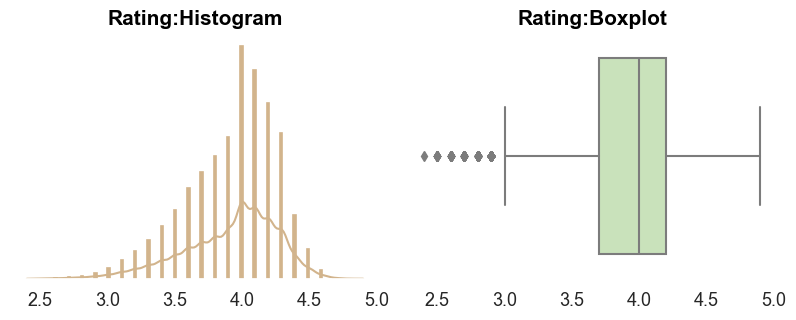

In [10]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13,'figure.autolayout':True})
plt.subplots(figsize=(12,6))

plt.subplot(231)
plt.title('Rating:Histogram', color='black',weight='bold',fontsize=15) 
sns.histplot(df.rating,color='#D2B48C',alpha=1,kde =True)
plt.xlabel(None),plt.yticks([]),plt.ylabel(None)

plt.subplot(232)
plt.title('Rating:Boxplot', color='black',weight='bold',fontsize=15)
sns.boxplot(df.rating,color="#c7e9b4",orient='h')
plt.xlabel(None),plt.ylabel(None),plt.yticks([])







(Text(0.5, 0, ''), ([], []), Text(0, 0.5, ''))

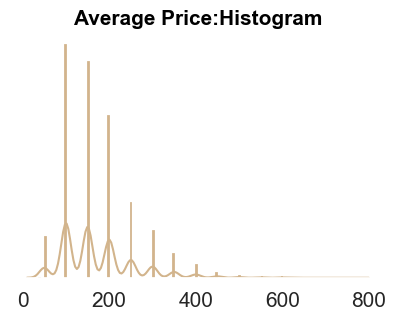

In [11]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':15,'ytick.labelsize':15,'figure.autolayout':True})
plt.subplots(figsize=(12,6))
plt.subplot(233)
plt.title('Average Price:Histogram',color='black',weight='bold',fontsize=15)
sns.histplot(df.average_price,color='#D2B48C',alpha=1,kde=True)
plt.xlabel(None),plt.yticks([]),plt.ylabel(None)









(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

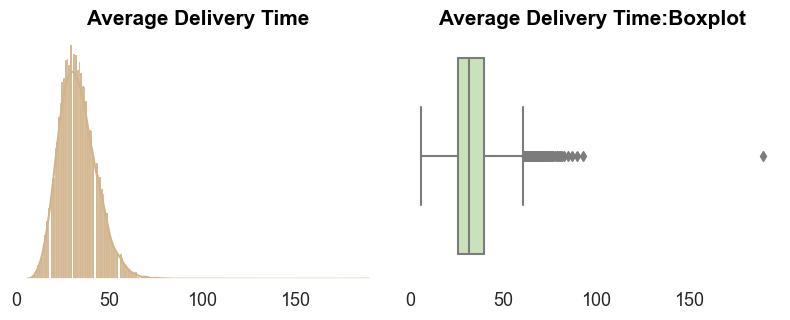

In [12]:
sns.set(rc={'axes.facecolor':'none','axes.grid':True,'xtick.labelsize':13,'ytick.labelsize':13,'figure.autolayout':True})
plt.subplots(figsize=(12,6))
plt.subplot(234)
plt.title('Average Delivery Time',color='black',weight='bold',fontsize=15)
sns.histplot(df['average _delivery_time'],color='#D2B48C',alpha=1,kde=True)
plt.xlabel(None),plt.yticks([]),plt.ylabel(None)

plt.subplot(235)
plt.title('Average Delivery Time:Boxplot',color='black',weight='bold',fontsize=15)
sns.boxplot(df['average _delivery_time'],color="#c7e9b4",orient='h')
plt.xlabel(None),plt.ylabel(None),plt.yticks([])


### Analysing the Restaurants on the basis of food items(North-Indian, South-Indian and Biryani)

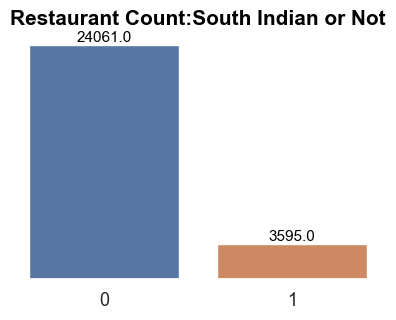

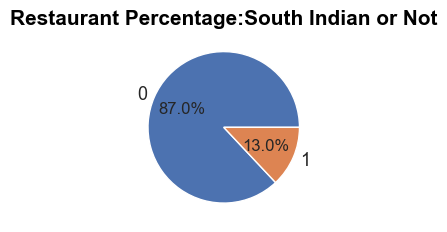

In [14]:
plt.subplots(figsize=(12,6))
plt.subplot(235)
plt.title('Restaurant Count:South Indian or Not',color='black',weight='bold',fontsize=15)
sns.countplot(x=df['south_indian_or_not'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(None),plt.yticks([]),plt.ylabel(None)
plt.show()


plt.subplot(236)
plt.figsize=(12,12)
plt.title('Restaurant Percentage:South Indian or Not',color='black',weight='bold',fontsize=15)
df['south_indian_or_not'].value_counts().plot(kind='pie',legend=None,ylabel='',autopct='%1.1f%%')
plt.show()

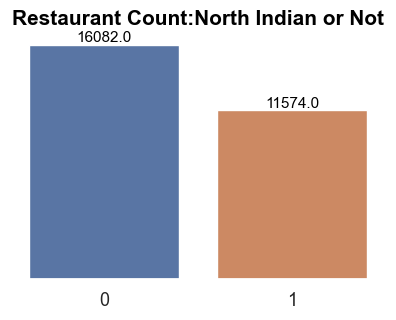

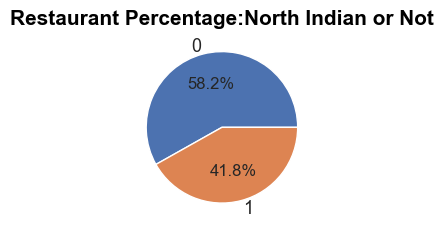

In [15]:
plt.subplots(figsize=(12,6))
plt.subplot(235)
plt.title('Restaurant Count:North Indian or Not',color='black',weight='bold',fontsize=15)
sns.countplot(x=df['north_indian_or_not'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(None),plt.yticks([]),plt.ylabel(None)
plt.show()


plt.subplot(236)
plt.figsize=(12,12)
plt.title('Restaurant Percentage:North Indian or Not',color='black',weight='bold',fontsize=15)
df['north_indian_or_not'].value_counts().plot(kind='pie',legend=None,ylabel='',autopct='%1.1f%%')
plt.show()

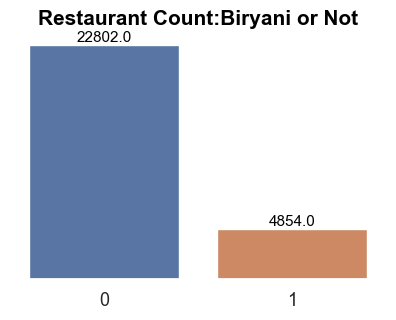

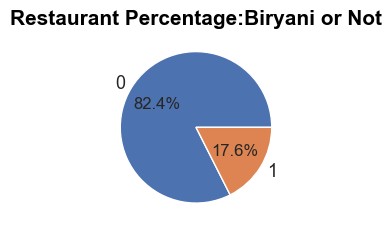

In [17]:
plt.subplots(figsize=(12,6))
plt.subplot(235)
plt.title('Restaurant Count:Biryani or Not',color='black',weight='bold',fontsize=15)
sns.countplot(x=df['biryani_or_not'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(None),plt.yticks([]),plt.ylabel(None)
plt.show()


plt.subplot(236)
plt.figsize=(12,12)
plt.title('Restaurant Percentage:Biryani or Not',color='black',weight='bold',fontsize=15)
df['biryani_or_not'].value_counts().plot(kind='pie',legend=None,ylabel='',autopct='%1.1f%%')
plt.show()

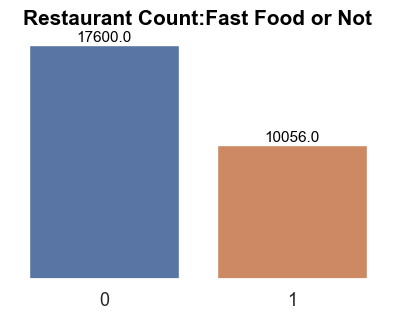

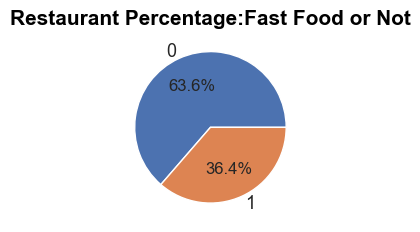

In [18]:
plt.subplots(figsize=(12,6))
plt.subplot(235)
plt.title('Restaurant Count:Fast Food or Not',color='black',weight='bold',fontsize=15)
sns.countplot(x=df['fast_food_or_not'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(None),plt.yticks([]),plt.ylabel(None)
plt.show()


plt.subplot(236)
plt.figsize=(12,12)
plt.title('Restaurant Percentage:Fast Food or Not',color='black',weight='bold',fontsize=15)
df['fast_food_or_not'].value_counts().plot(kind='pie',legend=None,ylabel='',autopct='%1.1f%%')
plt.show()

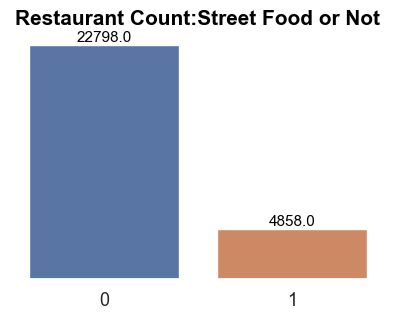

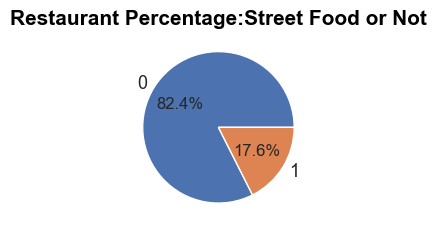

In [19]:
plt.subplots(figsize=(12,6))
plt.subplot(235)
plt.title('Restaurant Count:Street Food or Not',color='black',weight='bold',fontsize=15)
sns.countplot(x=df['street_food'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(None),plt.yticks([]),plt.ylabel(None)
plt.show()


plt.subplot(236)
plt.figsize=(12,12)
plt.title('Restaurant Percentage:Street Food or Not',color='black',weight='bold',fontsize=15)
df['street_food'].value_counts().plot(kind='pie',legend=None,ylabel='',autopct='%1.1f%%')
plt.show()

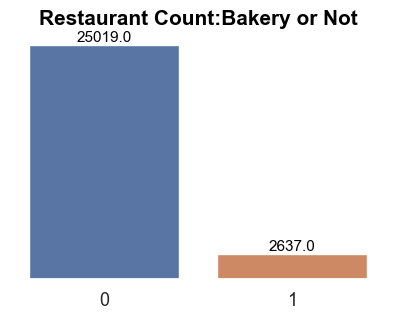

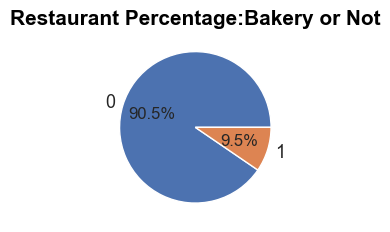

In [20]:
plt.subplots(figsize=(12,6))
plt.subplot(235)
plt.title('Restaurant Count:Bakery or Not',color='black',weight='bold',fontsize=15)
sns.countplot(x=df['bakery_or_not'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(None),plt.yticks([]),plt.ylabel(None)
plt.show()


plt.subplot(236)
plt.figsize=(12,12)
plt.title('Restaurant Percentage:Bakery or Not',color='black',weight='bold',fontsize=15)
df['bakery_or_not'].value_counts().plot(kind='pie',legend=None,ylabel='',autopct='%1.1f%%')
plt.show()

## Analysis by Location of the Restaurants

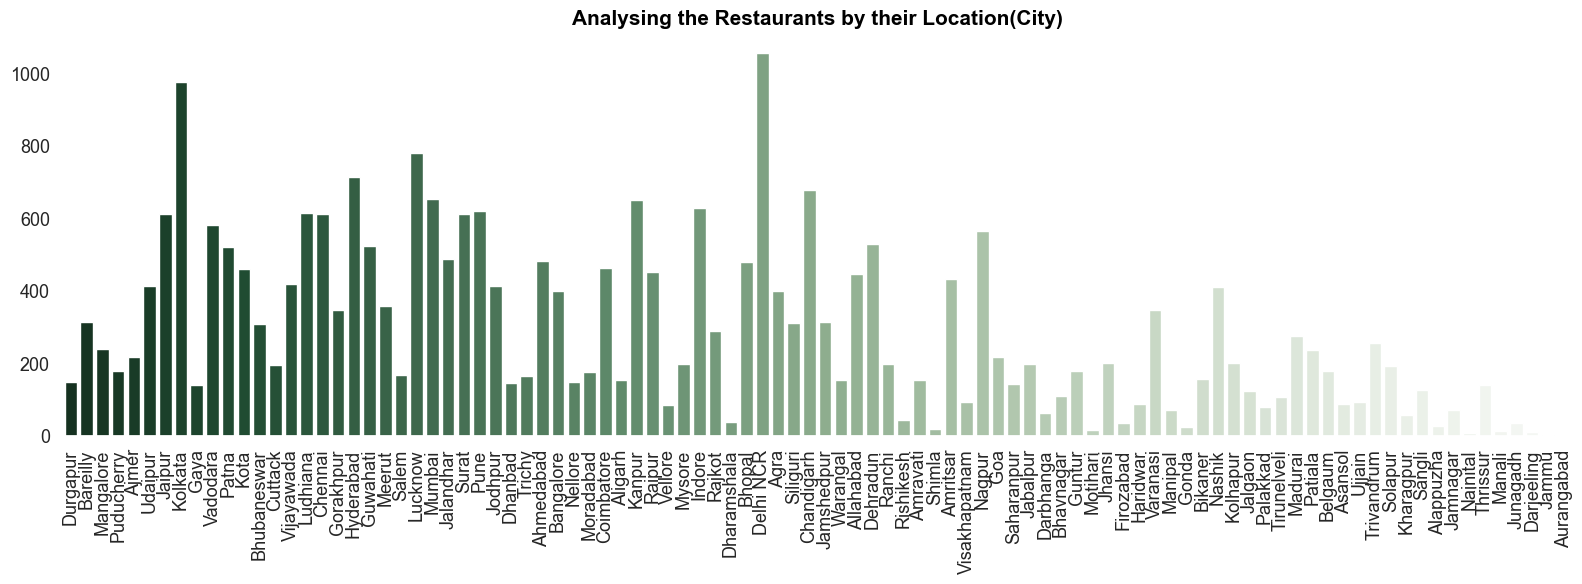

In [28]:
sns.set_style=("whitegrid")
plt.figure(figsize=(16,6))
plt.title('Analysing the Restaurants by their Location(City)',color='black',weight='bold',fontsize=15)
sns.countplot(x=df['location'],palette='Greens_r',saturation=0.4)
plt.xlabel(None),plt.xticks(rotation=90),plt.ylabel(None)
plt.show()

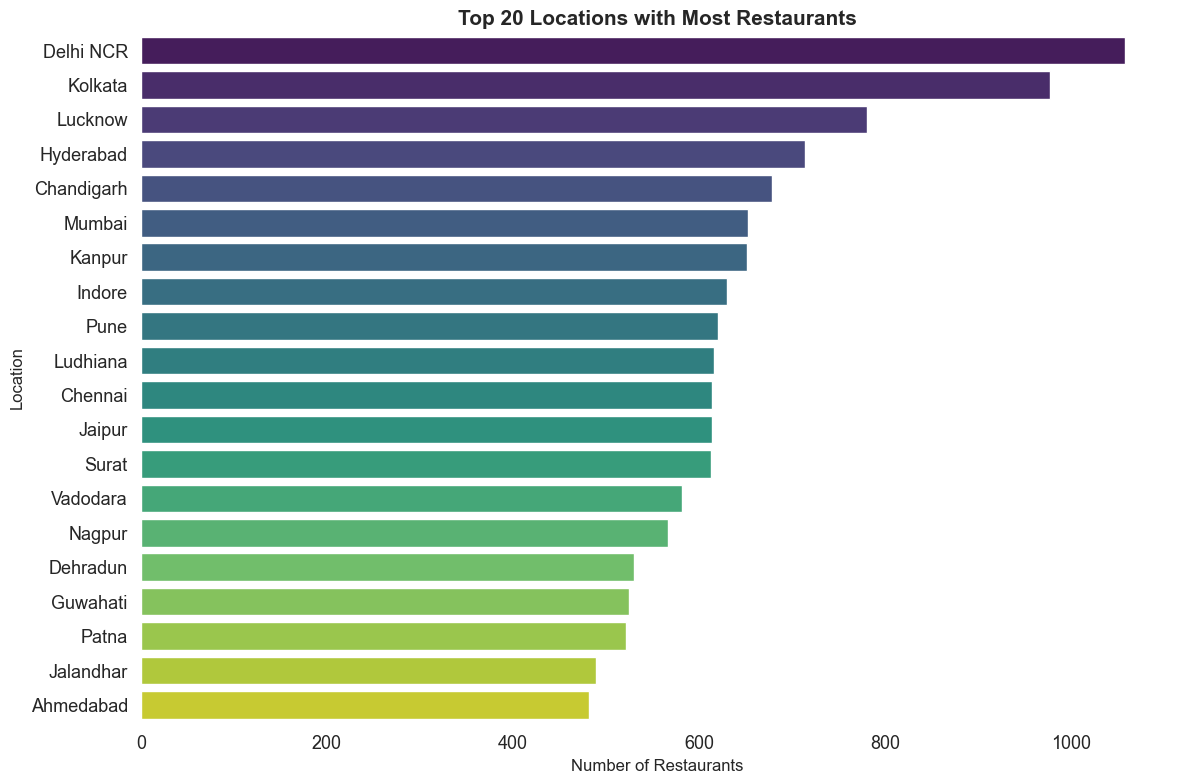

In [37]:
location_counts = df['location'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Top 20 Locations with Most Restaurants', weight='bold',fontsize=15)
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()


Text(0, 0.5, 'Location')

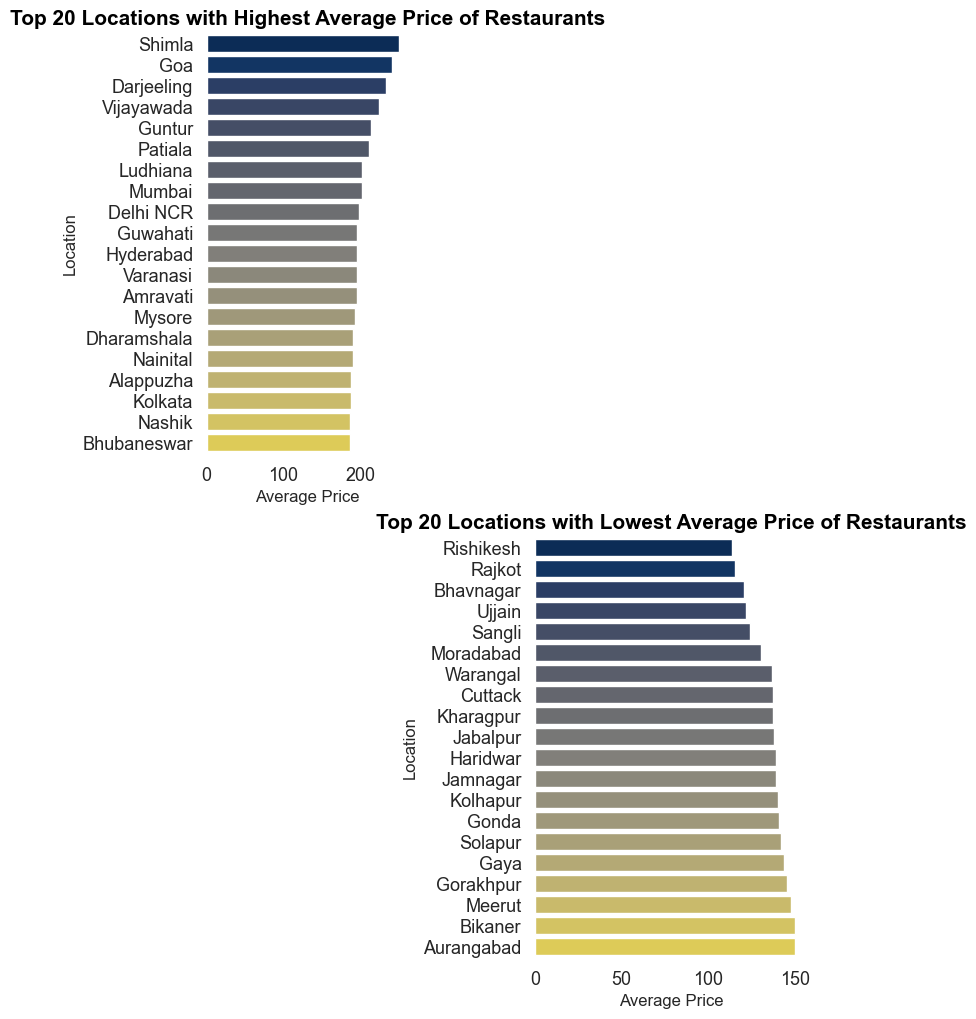

In [81]:
plt.subplots(figsize=(12,12))
plt.subplot(235)
average_prices = df.groupby('location')['average_price'].mean()
top_20_locations = average_prices.sort_values(ascending=True).head(20)
sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette='cividis')
plt.title('Top 20 Locations with Lowest Average Price of Restaurants',color='black',weight='bold',fontsize=15)
plt.xlabel('Average Price')
plt.ylabel('Location')

plt.subplot(241)
average_prices = df.groupby('location')['average_price'].mean()
top_20_locations = average_prices.sort_values(ascending=False).head(20)
sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette='cividis')
plt.title('Top 20 Locations with Highest Average Price of Restaurants',color='black',weight='bold',fontsize=15)
plt.xlabel('Average Price')
plt.ylabel('Location')






Text(0, 0.5, 'Location')

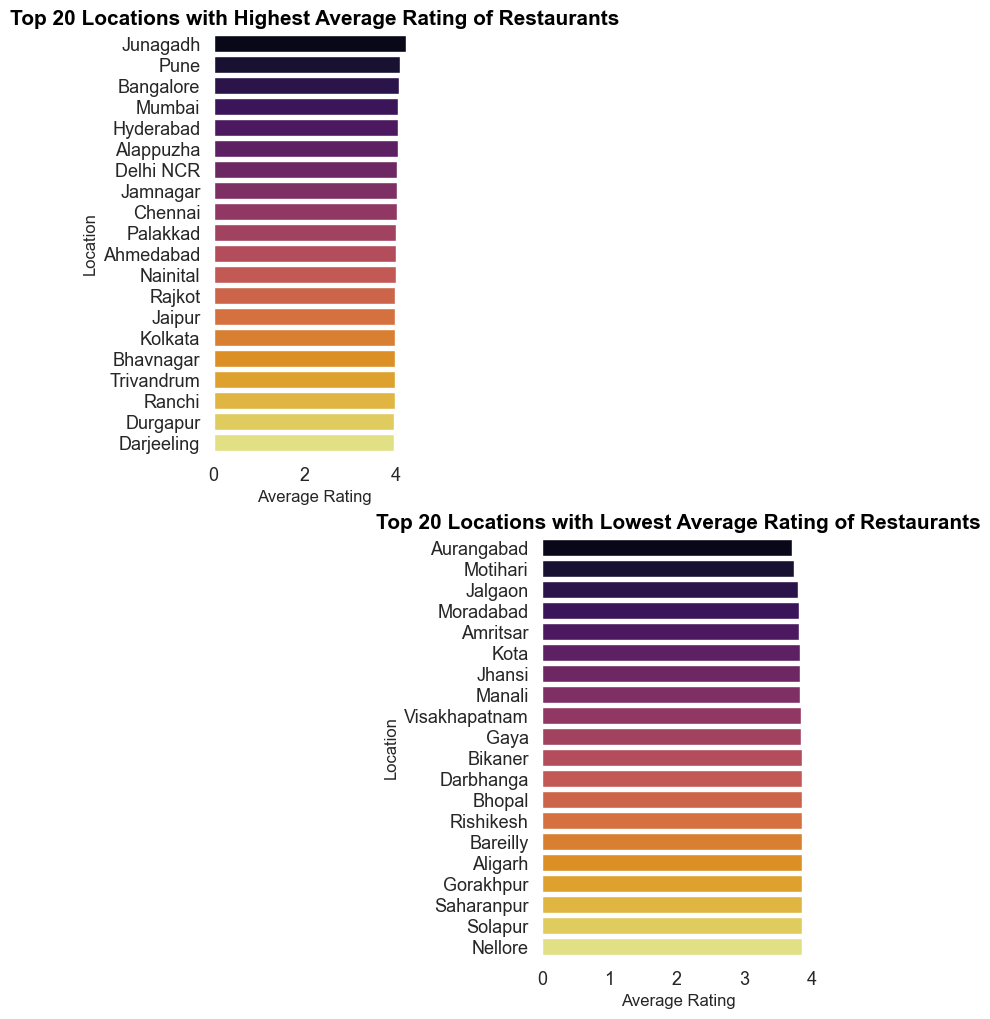

In [85]:
plt.subplots(figsize=(12,12))
plt.subplot(235)
average_rating = df.groupby('location')['rating'].mean()
top_20_locations = average_rating.sort_values(ascending=True).head(20)
sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette='inferno')
plt.title('Top 20 Locations with Lowest Average Rating of Restaurants',color='black',weight='bold',fontsize=15)
plt.xlabel('Average Rating')
plt.ylabel('Location')

plt.subplot(241)
average_rating = df.groupby('location')['rating'].mean()
top_20_locations = average_rating.sort_values(ascending=False).head(20)
sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette='inferno')
plt.title('Top 20 Locations with Highest Average Rating of Restaurants',color='black',weight='bold',fontsize=15)
plt.xlabel('Average Rating')
plt.ylabel('Location')


#### After analysing the restaurants by location-
